## Prophet Forecasting and Feature Importance Analysis on Appliance Energy Dataset

The dataset contains daily energy consumption of appliances, taken at 10-minute interval from January 11, 2016 to May 27, 2016. It has 19,735 rows (instances) and 29 columns (features).






Step 1: Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import os
import datetime
from prophet import Prophet

Step 2: Create the dataframe and get its info

In [2]:
df= pd.read_csv( "/content/KAG_energydata_complete.csv" )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

Step 3: Create a DateTime variable from date

In [3]:
df['DateTime']=pd.to_datetime(df['date'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  object        
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

Step 4: Remove null values and confirm the structure of dataset

In [5]:
df1 = df.dropna()
df1.shape

(19735, 30)

Step 5: Observe the first 5 rows of dataset

In [6]:
df.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,DateTime
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11 17:00:00
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11 17:10:00
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11 17:20:00
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11 17:30:00
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11 17:40:00


Step 6: Perform a 70:30 split for train-test split. Since it is timeseries data, random split does not work. We take 70% data from Jan 11 2016 to 27 May 2016 as training data. The remaining dataset is test data. The 70% point for this dataset is on April, 16, 2016.

In [7]:
split_date ='2016-04-16 15:20:00'
df_training = df1.loc[df['DateTime'] <= split_date]
df_test = df1.loc[df['DateTime'] > split_date]

Step 7: Create a dataframe for training data. Dependent variable is "Appliances" and independent variable is "DateTime"

In [8]:
df_training = df_training.rename(columns={'DateTime': 'ds','Appliances': 'y'})

Step 8: Initialize the Prophet model with linear growth, additive seasonality, changepoint prior scale of 20 to allow maximum flexibility, and fourier order of 8.

In [9]:
m = Prophet(growth='linear', interval_width=0.95)
m = Prophet(seasonality_mode='additive',changepoint_prior_scale=20)
m.add_seasonality(name='daily', period=1, fourier_order=8)

Step 9: Fit the model on training data

In [10]:
m.fit(df_training)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7xl0n_g3/tsveqe_m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7xl0n_g3/pu1529nn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40848', 'data', 'file=/tmp/tmp7xl0n_g3/tsveqe_m.json', 'init=/tmp/tmp7xl0n_g3/pu1529nn.json', 'output', 'file=/tmp/tmp7xl0n_g3/prophet_model7ikdds8t/prophet_model-20241210124927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Step 10: Forecast Appliances values and plot them to compare. Find the Pearson Correlation coefficient value.

In [11]:
forecast = m.predict(df_training.drop(columns="y"))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
13810,2016-04-16 14:40:00,128.259496,10.046247,245.628321
13811,2016-04-16 14:50:00,127.307251,5.354953,257.311499
13812,2016-04-16 15:00:00,125.969336,5.068691,249.840546
13813,2016-04-16 15:10:00,124.234201,4.212625,250.253432
13814,2016-04-16 15:20:00,122.170612,6.741404,245.343669


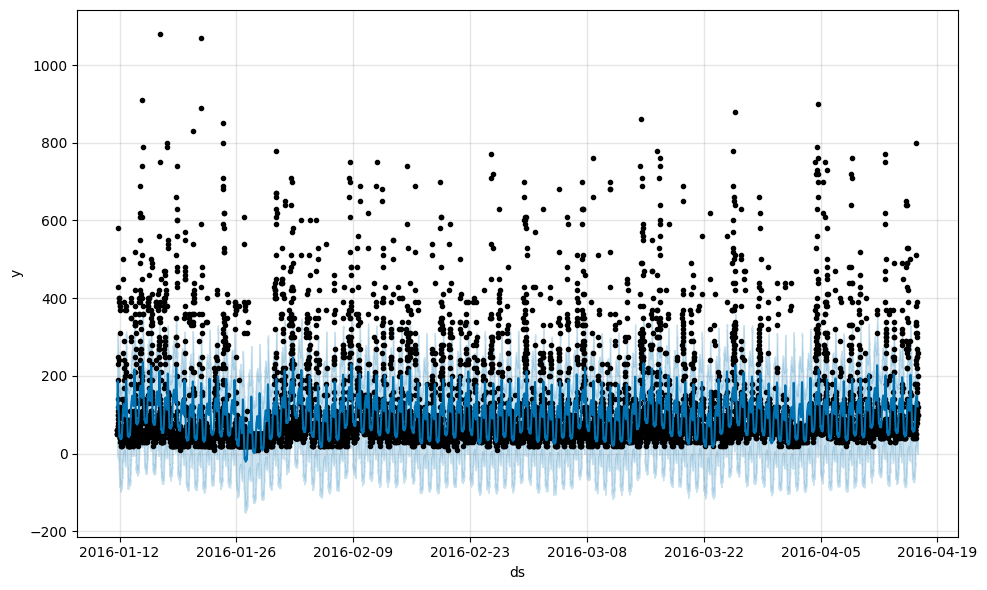

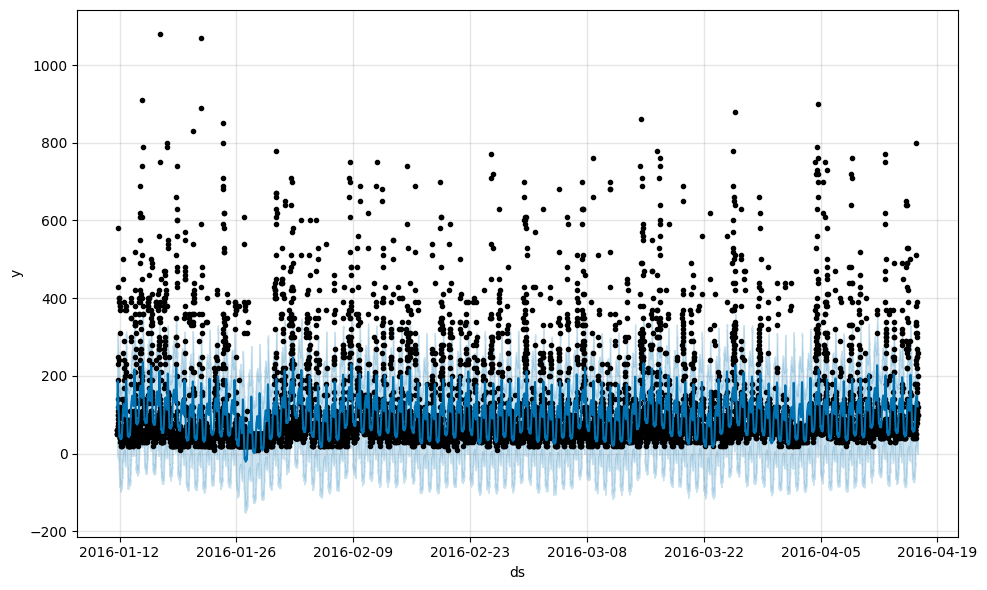

In [12]:
m.plot(forecast)

In [13]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast.yhat, df_training.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.43359976


Step 11: Repeat the steps for test data and find its Pearson correlation coefficient value.

In [14]:
df_test = df_test.rename(columns={'DateTime': 'ds','Appliances': 'y'})

In [15]:
forecast2 = m.predict(df_test.drop(columns="y"))

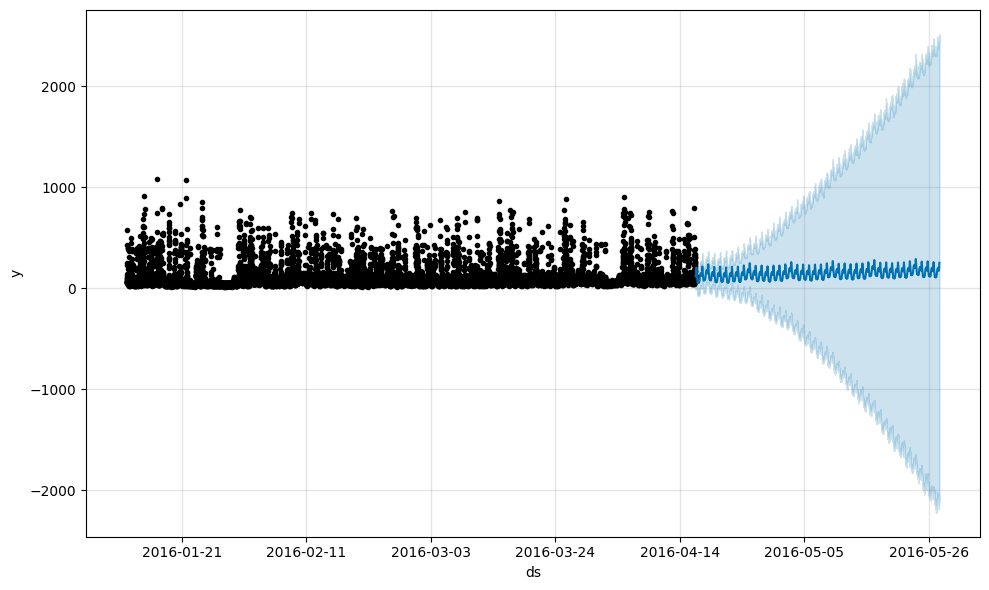

In [16]:
fig=m.plot(forecast2)

In [17]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast2.yhat, df_test.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.31976828


Step 12: Perform multivariate analysis by adding the remaining variables to the training and testing dataset and repeat the process to find Pearson Correlation coefficients.

In [18]:
df_training["add1"] = df1['lights']
df_training["add2"]= df1['T1']
df_training["add3"]= df1['RH_1']
df_training["add4"]=df1['T2']
df_training["add5"]=df1['RH_2']
df_training["add6"]= df1['T3']
df_training["add7"]=df1['RH_3']
df_training["add8"]=df1['T4']
df_training["add9"]=df1['RH_4']
df_training["add10"]=df1['T5']
df_training["add11"]=df1['RH_5']
df_training["add12"]=df1['T6']
df_training["add13"]=df1['RH_6']
df_training["add14"]=df1['T7']
df_training["add15"]=df1['RH_7']
df_training["add16"]=df1['T8']
df_training["add17"]=df1['RH_8']
df_training["add18"]=df1['T9']
df_training["add19"]=df1['RH_9']
df_training["add20"]=df1['T_out']
df_training["add21"]=df1['Press_mm_hg']
df_training["add22"]=df1['RH_out']
df_training["add23"]=df1['Windspeed']
df_training["add24"]=df1['Visibility']
df_training["add25"]=df1['Tdewpoint']
df_training["add26"]=df1['rv1']

In [19]:
m2 = Prophet(growth='linear', interval_width=0.95)
m2 = Prophet(seasonality_mode='additive',changepoint_prior_scale=20)
m2.add_seasonality(name='daily', period=1, fourier_order=8)
m2.add_regressor('add1')
m2.add_regressor('add2')
m2.add_regressor('add3')
m2.add_regressor('add4')
m2.add_regressor('add5')
m2.add_regressor('add6')
m2.add_regressor('add7')
m2.add_regressor('add8')
m2.add_regressor('add9')
m2.add_regressor('add10')
m2.add_regressor('add11')
m2.add_regressor('add12')
m2.add_regressor('add13')
m2.add_regressor('add14')
m2.add_regressor('add15')
m2.add_regressor('add16')
m2.add_regressor('add17')
m2.add_regressor('add18')
m2.add_regressor('add19')
m2.add_regressor('add20')
m2.add_regressor('add21')
m2.add_regressor('add22')
m2.add_regressor('add23')
m2.add_regressor('add24')
m2.add_regressor('add25')
m2.add_regressor('add26')

In [20]:
m2.fit(df_training)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7xl0n_g3/lta9c1a7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7xl0n_g3/k3jz88m7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15619', 'data', 'file=/tmp/tmp7xl0n_g3/lta9c1a7.json', 'init=/tmp/tmp7xl0n_g3/k3jz88m7.json', 'output', 'file=/tmp/tmp7xl0n_g3/prophet_model7pdwtrpc/prophet_model-20241210124945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [21]:
forecast = m2.predict(df_training.drop(columns="y"))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
13810,2016-04-16 14:40:00,219.595013,103.514897,338.105335
13811,2016-04-16 14:50:00,218.609160,101.606346,335.504445
13812,2016-04-16 15:00:00,207.163558,100.936363,319.265118
13813,2016-04-16 15:10:00,199.039732,90.104386,311.987600
13814,2016-04-16 15:20:00,189.376679,67.981937,305.351075


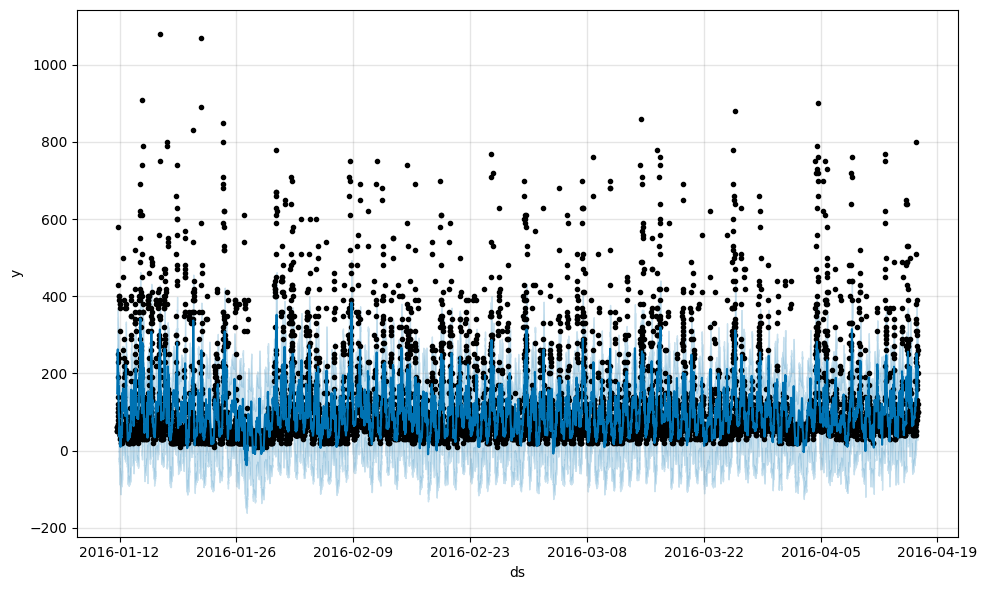

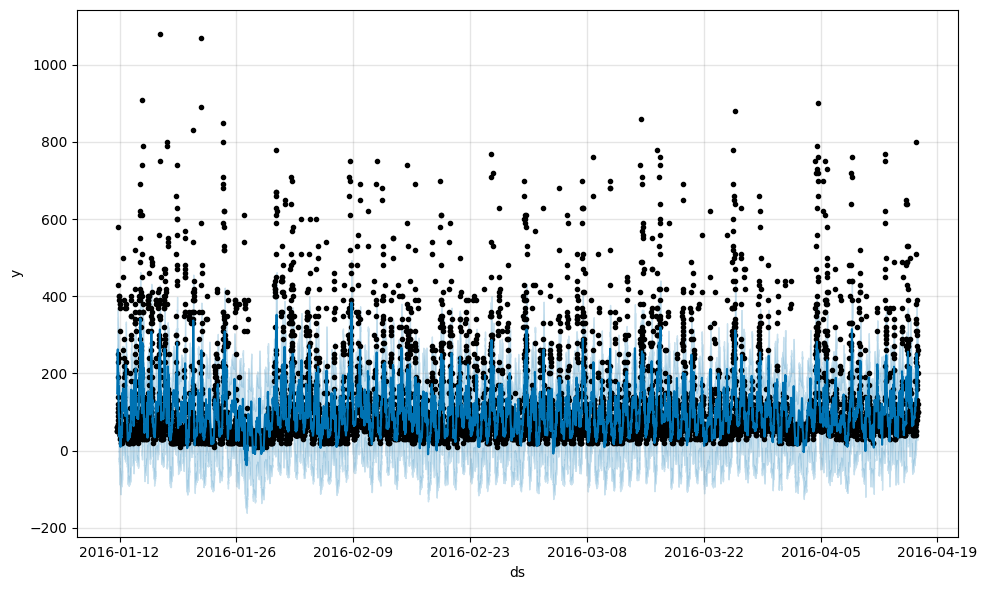

In [22]:
m2.plot(forecast)

In [23]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast.yhat, df_training.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.51728505


In [24]:
df_test["add1"] = df1['lights']
df_test["add2"]= df1['T1']
df_test["add3"]= df1['RH_1']
df_test["add4"]=df1['T2']
df_test["add5"]=df1['RH_2']
df_test["add6"]= df1['T3']
df_test["add7"]=df1['RH_3']
df_test["add8"]=df1['T4']
df_test["add9"]=df1['RH_4']
df_test["add10"]=df1['T5']
df_test["add11"]=df1['RH_5']
df_test["add12"]=df1['T6']
df_test["add13"]=df1['RH_6']
df_test["add14"]=df1['T7']
df_test["add15"]=df1['RH_7']
df_test["add16"]=df1['T8']
df_test["add17"]=df1['RH_8']
df_test["add18"]=df1['T9']
df_test["add19"]=df1['RH_9']
df_test["add20"]=df1['T_out']
df_test["add21"]=df1['Press_mm_hg']
df_test["add22"]=df1['RH_out']
df_test["add23"]=df1['Windspeed']
df_test["add24"]=df1['Visibility']
df_test["add25"]=df1['Tdewpoint']
df_test["add26"]=df1['rv1']

In [25]:
forecast2 = m2.predict(df_test.drop(columns="y"))

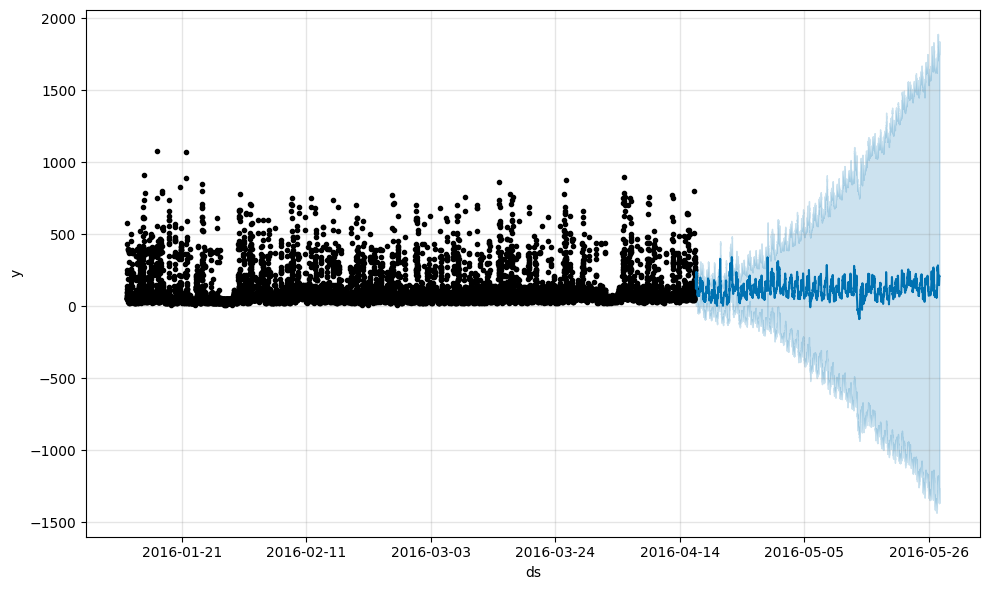

In [26]:
fig=m2.plot(forecast2)

Multivariate analysis is able to give a better result compared to univariate analysis.

In [27]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast2.yhat, df_test.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.40692297


The daily trend component shows that energy consumption begins to rise from 6:51 AM, peaks at around 7:00 PM and begins to decreases after that. The weekly trend shows a dip in energy consumption between Tuesday and Friday. In general, there is an upward trend in energy usage.

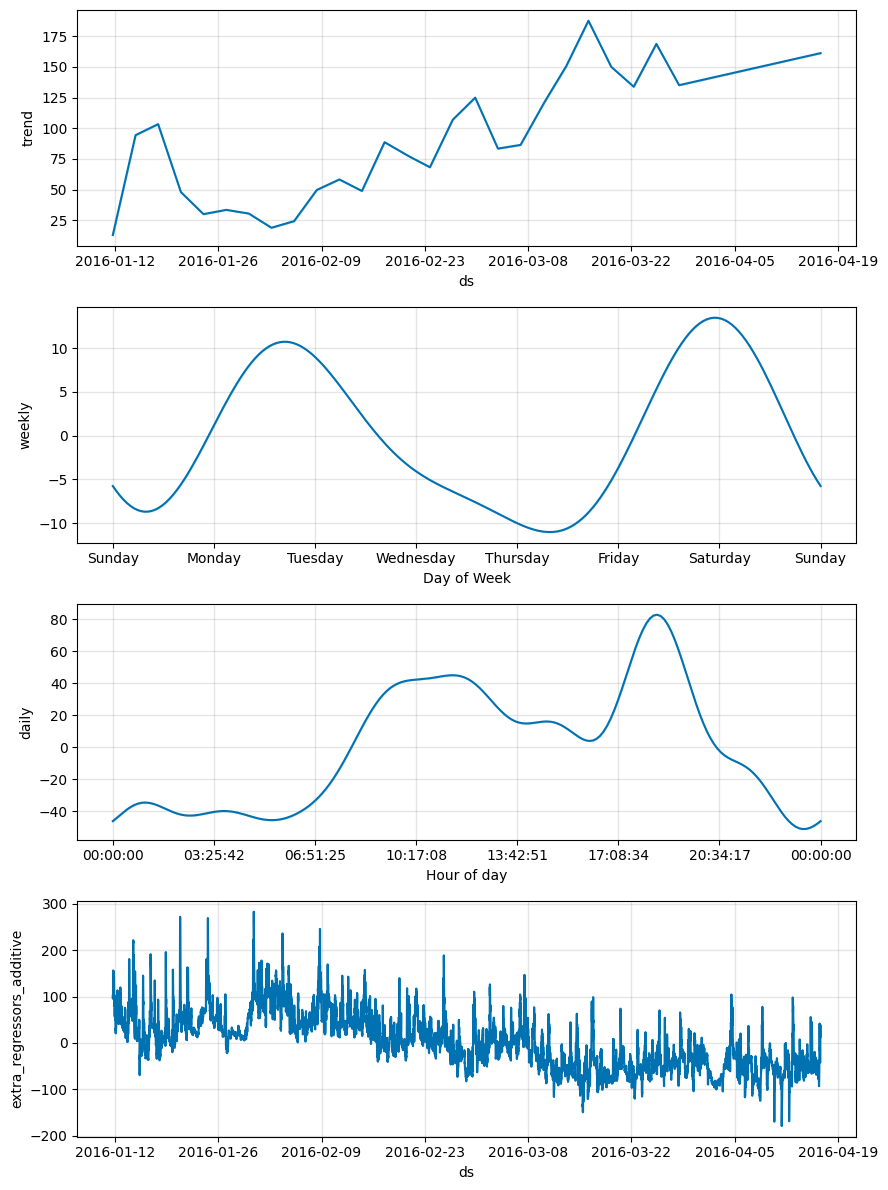

In [28]:
fig2 = m2.plot_components(forecast)

In [29]:
g2=pd.DataFrame(forecast2[['yhat']])
g2.to_csv('C:\\Users\\Sai Bharadwaja\\Desktop\\PGDM Marketing\\Term 5\\Big Data Analytics\\Project\\KAG_energydata_complete.csv')

The model shows that only 16.55% of change in dependent variable is explained by the independent variables.

In [30]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_test['y'], forecast2['yhat'])
print("Mean Square Error:\n")
print(mse)
rsme = math.sqrt(mse)
print("\nRoot Mean Square Error:\n")
print(rsme)
corr_matrix = np.corrcoef(df_test['y'], forecast2['yhat'])
corr = corr_matrix[0,1]
R_sq = corr**2
print("\n R Square:\n")
print(R_sq)

Mean Square Error:

7886.095058939652

Root Mean Square Error:

88.8036883183331

 R Square:

0.1655863014476373


# Analyzing Feature Importance

Step 1: Import necessary libraries and encode categorical variables

In [31]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [32]:
df = pd.read_csv( "/content/KAG_energydata_complete.csv" )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [33]:
c = df.dropna()
X_features = list(c.columns)
X_features.remove('Appliances')  # Remove the first variable
X_features.remove('date')  # Remove the second variable
X_features

['lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

In [34]:
encoded_df = pd.get_dummies( c[X_features], drop_first = True )
list(encoded_df.columns)

['lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

Step 2: Input the dependent variable (Appliances) as Y and encoded dataframe as X. This code splits the dataset (X for features and Y for the target variable) into training and testing sets using an 80-20 ratio with a fixed random seed (random_state=42) to ensure reproducibility, as part of the preparation for feature importance analysis using models like GradientBoostingRegressor.

In [35]:
X=encoded_df
Y=c.Appliances
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import seaborn as sn
import matplotlib.pylab as plt
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state = 42)

Step 3: Import the Shap library and explain through Gradient Boosting model

In [36]:
import shap
my_model = GradientBoostingRegressor().fit(X, Y)
#explainer = shap.TreeExplainer(my_model)

The bar lengths represent the mean absolute SHAP value of each feature.
This indicates how much each feature contributes, on average, to the model's predictions.Features at the top have the highest impact on the predictions. "lights" is the most influential feature, contributing a mean absolute SHAP value of 12.86, followed by "RH_1" with 11.79.

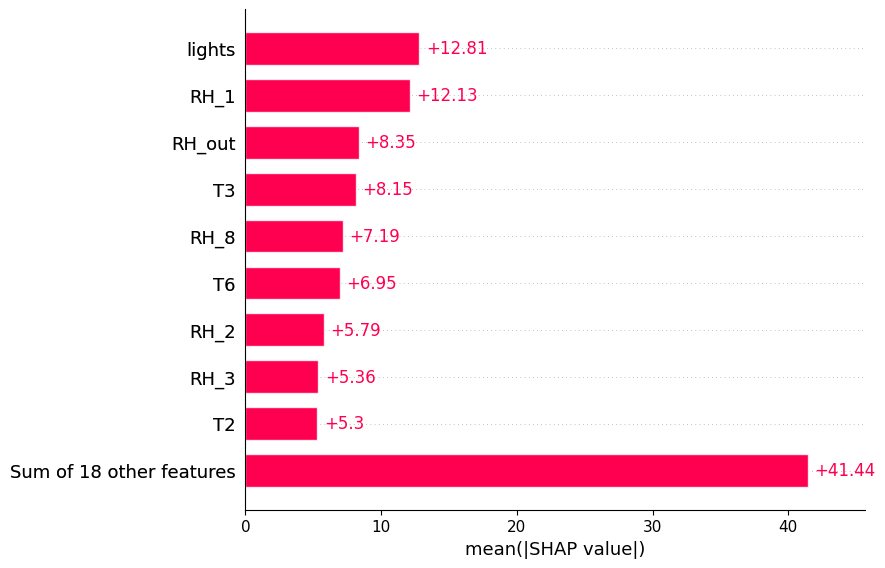

In [37]:
explainer = shap.Explainer(my_model)
shap_values2 = explainer(X)
shap.plots.bar(shap_values2)

"lights" is the most influential, where higher values (red) consistently increase predictions, while features like RH_1 and RH_out also significantly affect predictions but in a more mixed manner. The horizontal spread shows variability in the feature's impact, and the color gradient (blue for low values, red for high values) highlights whether high or low feature values drive predictions up or down. Less impactful features, like RH_6 and Press_mm_hg, have smaller SHAP values, indicating a minimal influence on the model's output.

Generating summary plot...


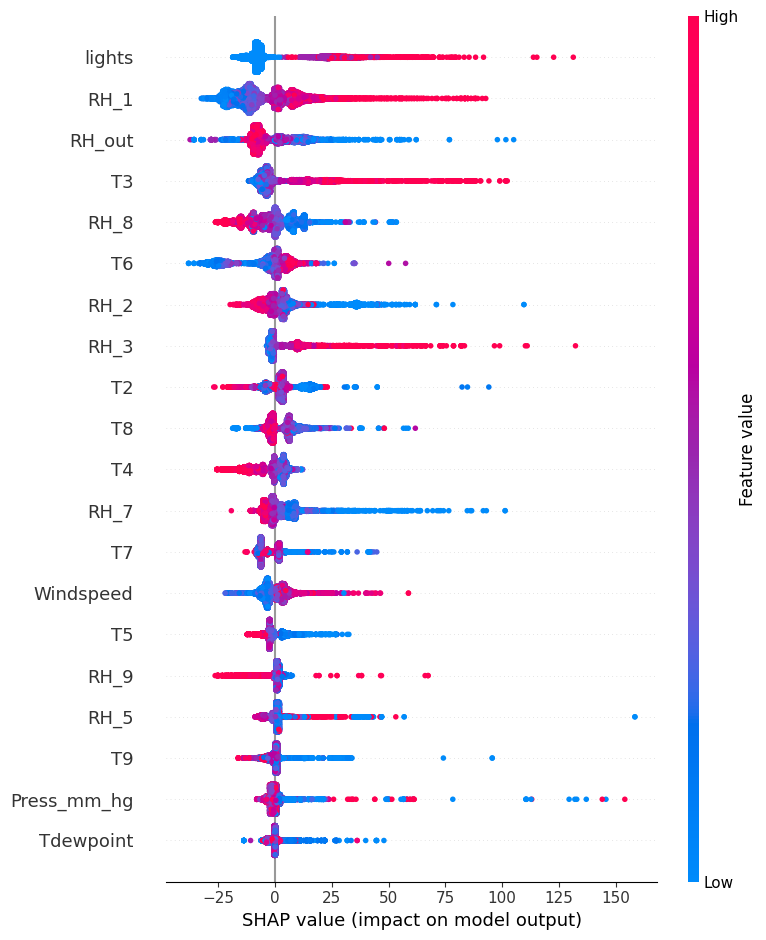

In [38]:
# Summary plot
print("Generating summary plot...")
shap.summary_plot(shap_values2, X)

ALE (Accumulated Local Effects) plots show how a feature or a pair of features influences the model's predictions by averaging their localized effects across the dataset while accounting for feature interactions and avoiding extrapolation bias.

In [39]:
!pip install PyALE

In [40]:
from PyALE import ale

Step 1: Input features for ALE Plots

In [41]:
features = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3','RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6',
 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']

In [42]:
# Features seen by the model during training
print(my_model.feature_names_in_)

['lights' 'T1' 'RH_1' 'T2' 'RH_2' 'T3' 'RH_3' 'T4' 'RH_4' 'T5' 'RH_5' 'T6'
 'RH_6' 'T7' 'RH_7' 'T8' 'RH_8' 'T9' 'RH_9' 'T_out' 'Press_mm_hg' 'RH_out'
 'Windspeed' 'Visibility' 'Tdewpoint' 'rv1' 'rv2']


In [43]:
# Features passed to ALE
print(features)

['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


This 1D ALE plot shows how the feature lights impacts the model's predictions. At lights = 0, the effect on predictions is significantly positive, indicating a strong influence. Between 10 and 50, the effect is relatively small and stable, contributing minimally to the predictions. However, when lights exceeds 50, there is a sharp increase in its effect, suggesting a strong positive relationship with the target variable at higher values. The bar plot indicates that most data points have lights = 0, making this value particularly important for the model's behavior.

INFO:PyALE._ALE_generic:Discrete feature detected.


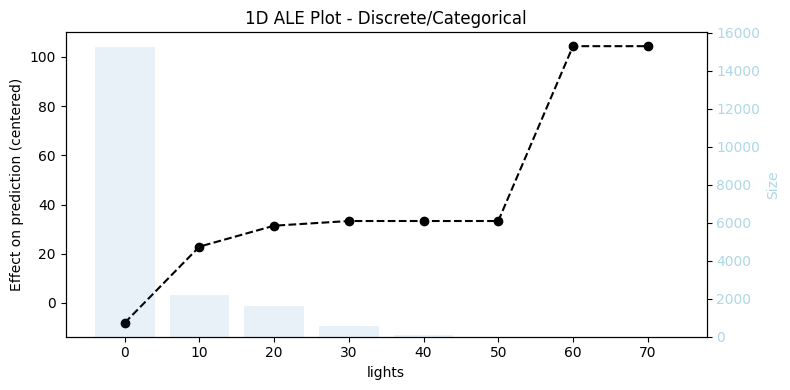

In [44]:
ale_eff = ale(
    X=X[features], model=my_model, feature=["lights"], grid_size=50, include_CI=False
)

This 1D ALE plot illustrates how the feature RH_1 influences the model's predictions. At lower values of RH_1 (below 35), the effect on predictions is negative and stable, with a slight drop around 35. Between 35 and 50, the effect gradually increases, indicating a growing positive impact on the predictions. After RH_1 exceeds 50, the effect sharply increases, showing a strong positive influence on the model's output for higher values of RH_1. The black ticks along the X-axis represent the distribution of RH_1 values in the dataset, with most data concentrated between 30 and 50, suggesting these ranges are critical for the model's behavior.

INFO:PyALE._ALE_generic:Continuous feature detected.


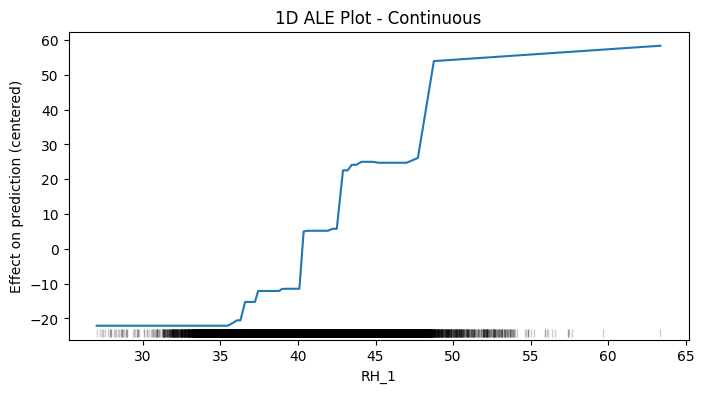

In [45]:
ale_eff = ale(
    X=X[features], model=my_model, feature=["RH_1"], grid_size=50, include_CI=False
)

INFO:PyALE._ALE_generic:Continuous feature detected.


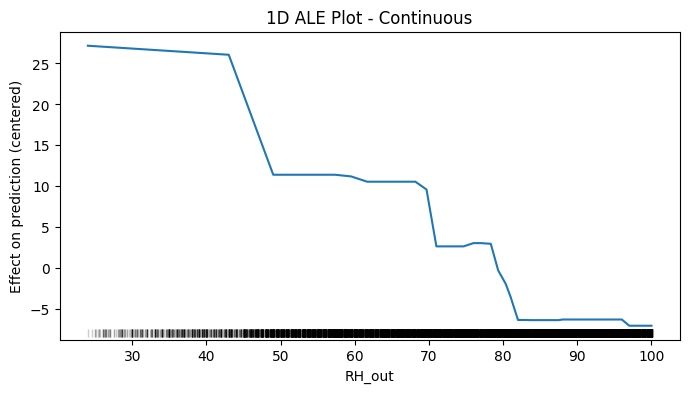

In [46]:
ale_eff = ale(
    X=X[features], model=my_model, feature=["RH_out"], grid_size=50, include_CI=False
)

INFO:PyALE._ALE_generic:Continuous feature detected.


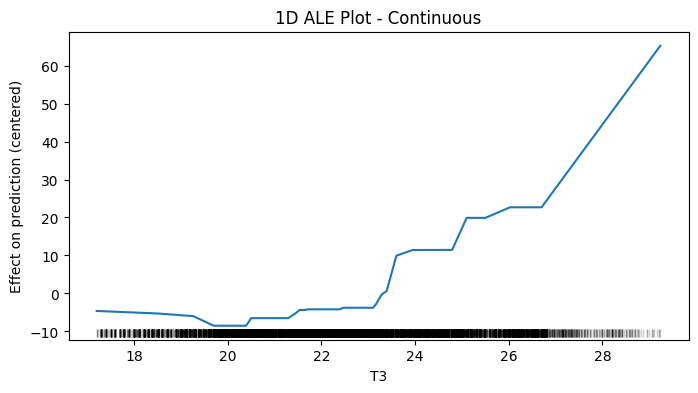

In [47]:
ale_eff = ale(
    X=X[features], model=my_model, feature=["T3"], grid_size=50, include_CI=False
)

INFO:PyALE._ALE_generic:Continuous feature detected.


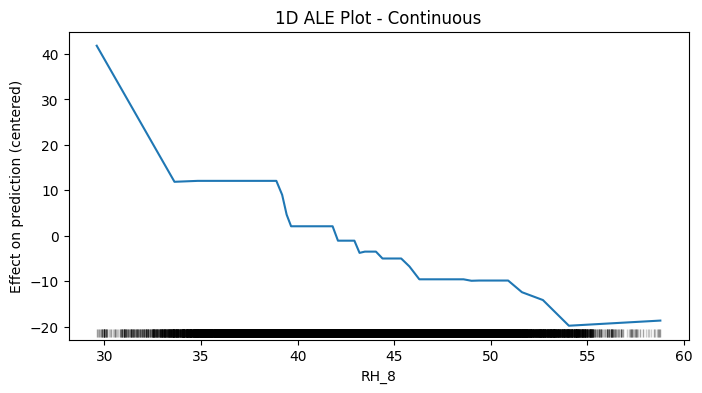

In [48]:
ale_eff = ale(
    X=X[features], model=my_model, feature=["RH_8"], grid_size=50, include_CI=False
)

This 2D ALE plot shows the interaction between lights and RH_1 and their combined effect on the model's predictions. High values of both lights (above 50) and RH_1 (above 50) result in a strong positive effect (yellow regions), increasing predictions significantly. Conversely, low values of either feature, especially when both are low, lead to a negative effect (purple regions), reducing predictions. For low lights values (below 10), the predictions are consistently negative regardless of RH_1, while higher lights values amplify the positive influence of RH_1, highlighting a strong non-linear interaction between these features.

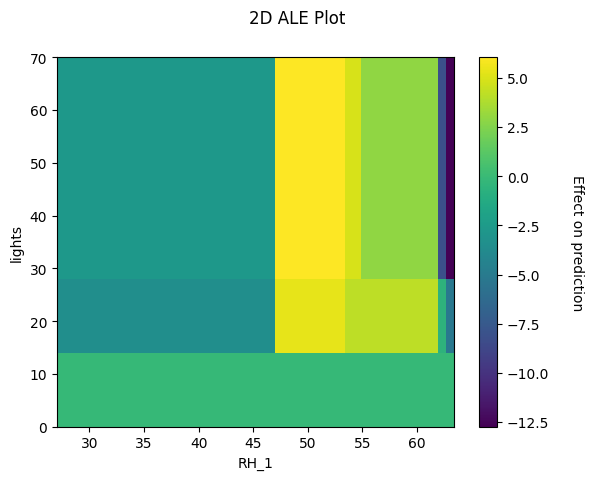

In [49]:
ale_eff = ale(X=X[features], model=my_model, feature=["lights","RH_1"], grid_size=50)

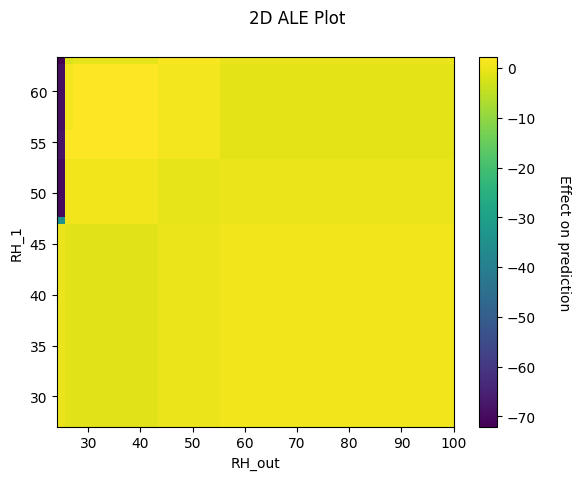

In [50]:
ale_eff = ale(X=X[features], model=my_model, feature=["RH_1","RH_out"], grid_size=50)

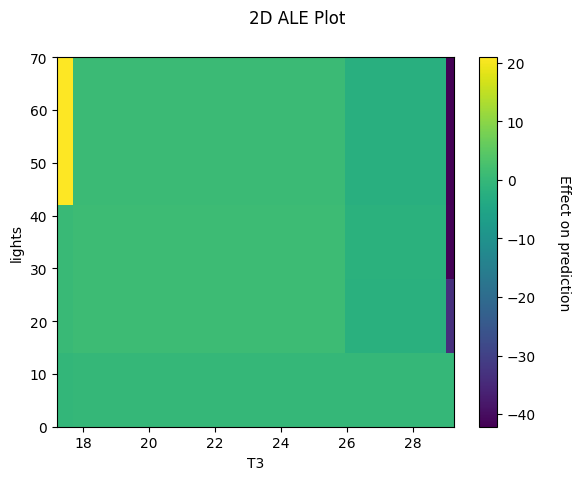

In [51]:
ale_eff = ale(X=X[features], model=my_model, feature=["lights","T3"], grid_size=50)

In [52]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=68bf3371d490c21c2b7e4d1df8db8353d2f89d69e95a871a9b39aea8bd5a2984
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [53]:
import lime
import lime.lime_tabular
dataset = pd.read_csv('/content/KAG_energydata_complete.csv')
Y=dataset['Appliances']
X=dataset[['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3','RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6',
 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out',
 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']]
X_featurenames=X.columns

In [54]:
model = GradientBoostingRegressor().fit(X, Y)

Local explanation graph shows the contribution of individual features to a specific prediction made by the model, highlighting the positive (green) and negative (red) effects. At instance 519, lights > 0.00 and RH_3 > 41.76 have the largest positive impact on increasing the prediction, with T8 <= 20.79 and T5 <= 18.28 also contributing positively but to a lesser extent. Conversely, T6 <= 3.63 and 20.79 < T3 <= 22.10 have the most significant negative impacts, reducing the prediction. Features like RH_8 > 46.54 and Tdewpoint <= 0.90 also contribute positively, while conditions such as 750.93 < Press_mm_hg <= 756.10 have minor negative impacts. This graph provides a detailed breakdown of how each feature drives the prediction for a specific data point.

Intercept 145.66480889259208
Prediction_local [190.92506159]
Right: 134.0027237408587


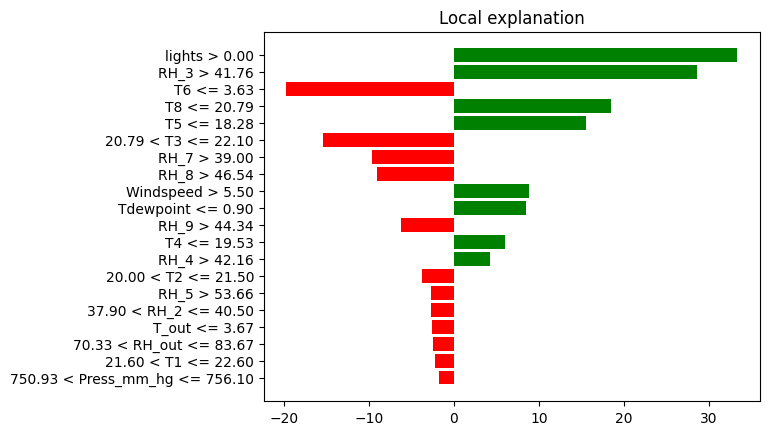

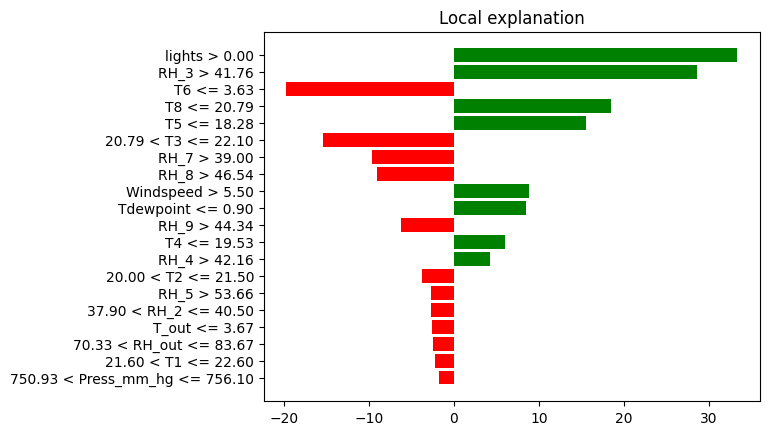

In [55]:
explainer=lime.lime_tabular.LimeTabularExplainer(np.array(X),feature_names=X_featurenames, class_names=['Regression'],verbose=True,mode='regression')
exp=explainer.explain_instance(X.iloc[519],model.predict,num_features=20)
exp.as_pyplot_figure()

# Repeating Prophet Forecasting with Key Features

In [56]:
df= pd.read_csv( "/content/KAG_energydata_complete.csv" )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [57]:
df['DateTime']=pd.to_datetime(df['date'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  object        
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [59]:
split_date ='2016-04-16 15:20:00'
df_training = df1.loc[df['DateTime'] <= split_date]
df_test = df1.loc[df['DateTime'] > split_date]

In [60]:
df_training = df_training.rename(columns={'DateTime': 'ds','Appliances': 'y'})

In [61]:
m = Prophet(growth='linear', interval_width=0.95)
m = Prophet(seasonality_mode='additive',changepoint_prior_scale=20)
m.add_seasonality(name='daily', period=1, fourier_order=8)

In [62]:
m.fit(df_training)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7xl0n_g3/530jnmep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7xl0n_g3/2ncu6495.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34391', 'data', 'file=/tmp/tmp7xl0n_g3/530jnmep.json', 'init=/tmp/tmp7xl0n_g3/2ncu6495.json', 'output', 'file=/tmp/tmp7xl0n_g3/prophet_model32lw679g/prophet_model-20241210125254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:52:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:53:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [63]:
forecast = m.predict(df_training.drop(columns="y"))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
13810,2016-04-16 14:40:00,128.259496,6.273463,244.380699
13811,2016-04-16 14:50:00,127.307251,-3.625388,250.601966
13812,2016-04-16 15:00:00,125.969336,3.334750,249.264978
13813,2016-04-16 15:10:00,124.234201,-4.804596,244.943210
13814,2016-04-16 15:20:00,122.170612,1.584981,235.403557


In [64]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast.yhat, df_training.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.43359976


In [65]:
df_test = df_test.rename(columns={'DateTime': 'ds','Appliances': 'y'})

In [66]:
forecast2 = m.predict(df_test.drop(columns="y"))

In [67]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast2.yhat, df_test.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.31976828


In [80]:
df_training["add1"] = df1['lights']
df_training["add2"]= df1['RH_1']
df_training["add3"]= df1['RH_out']
df_training["add4"]=df1['T3']
df_training["add5"]=df1['RH_8']
df_training["add6"]= df1['T6']
df_training["add7"]=df1['RH_3']
df_training["add8"]=df1['T2']
df_training["add9"]=df1['RH_2']
df_training["add10"]=df1['T8']
df_training["add11"]=df1['T4']
df_training["add12"]=df1['RH_7']
df_training["add13"]=df1['T7']
df_training["add14"]=df1['Windspeed']
df_training["add15"]=df1['T5']
df_training["add16"]=df1['RH_9']
df_training["add17"]=df1['RH_5']
df_training["add18"]=df1['T9']
df_training["add19"]=df1['Press_mm_hg']
df_training["add20"]=df1['RH_6']

In [81]:
m2 = Prophet(growth='linear', interval_width=0.95)
m2 = Prophet(seasonality_mode='additive',changepoint_prior_scale=20)
m2.add_seasonality(name='daily', period=1, fourier_order=8)
m2.add_regressor('add1')
m2.add_regressor('add2')
m2.add_regressor('add3')
m2.add_regressor('add4')
m2.add_regressor('add5')
m2.add_regressor('add6')
m2.add_regressor('add7')
m2.add_regressor('add8')
m2.add_regressor('add9')
m2.add_regressor('add10')
m2.add_regressor('add11')
m2.add_regressor('add12')
m2.add_regressor('add13')
m2.add_regressor('add14')
m2.add_regressor('add15')
m2.add_regressor('add16')
m2.add_regressor('add17')
m2.add_regressor('add18')
m2.add_regressor('add19')
m2.add_regressor('add20')

In [82]:
m2.fit(df_training)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'daily', disabling built-in 'daily' seasonality.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7xl0n_g3/ve_73r1r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7xl0n_g3/2_826o6n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60261', 'data', 'file=/tmp/tmp7xl0n_g3/ve_73r1r.json', 'init=/tmp/tmp7xl0n_g3/2_826o6n.json', 'output', 'file=/tmp/tmp7xl0n_g3/prophet_modelpnnq27_1/prophet_model-20241210125503.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:55:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:55:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [83]:
forecast = m2.predict(df_training.drop(columns="y"))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
13810,2016-04-16 14:40:00,220.511362,94.358014,341.352422
13811,2016-04-16 14:50:00,218.052084,98.526602,330.842118
13812,2016-04-16 15:00:00,205.985175,87.445359,316.283348
13813,2016-04-16 15:10:00,198.545311,77.460401,311.781049
13814,2016-04-16 15:20:00,190.999349,69.137034,305.116093


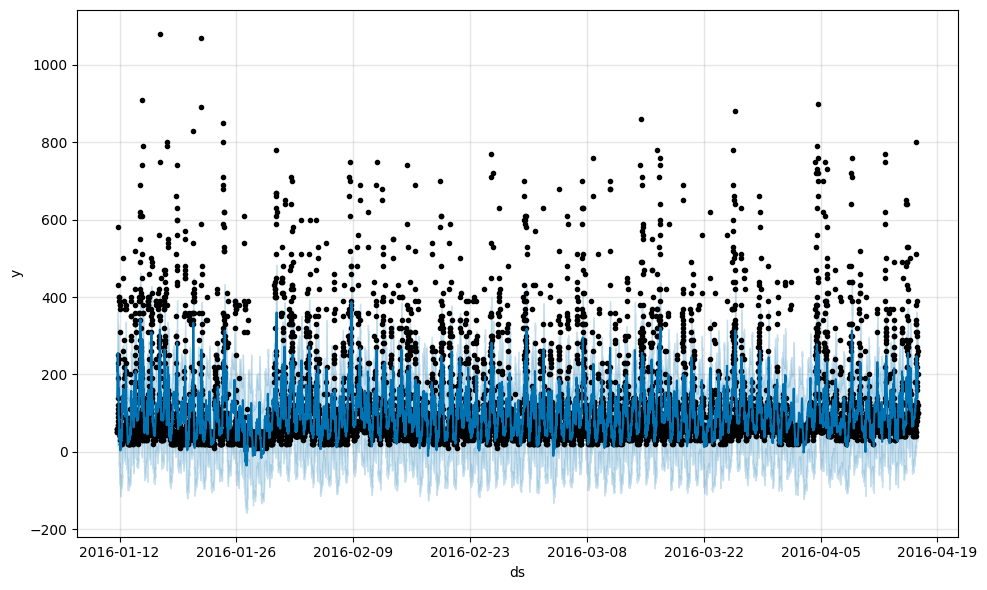

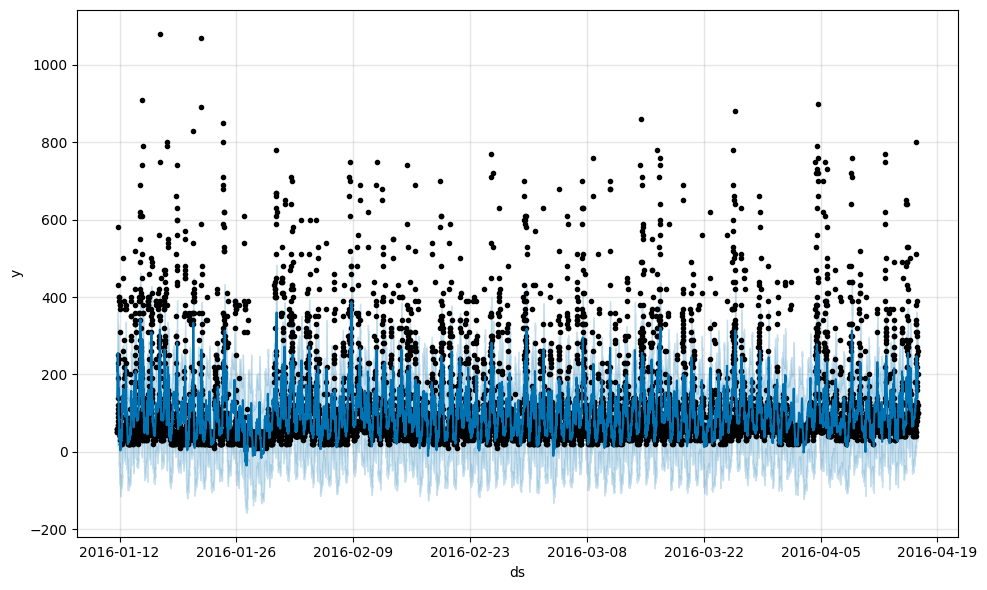

In [84]:
m2.plot(forecast)

In [85]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast.yhat, df_training.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.51698883


In [86]:
df_test["add1"] = df1['lights']
df_test["add2"]= df1['RH_1']
df_test["add3"]= df1['RH_out']
df_test["add4"]=df1['T3']
df_test["add5"]=df1['RH_8']
df_test["add6"]= df1['T6']
df_test["add7"]=df1['RH_3']
df_test["add8"]=df1['T2']
df_test["add9"]=df1['RH_2']
df_test["add10"]=df1['T8']
df_test["add11"]=df1['T4']
df_test["add12"]=df1['RH_7']
df_test["add13"]=df1['T7']
df_test["add14"]=df1['Windspeed']
df_test["add15"]=df1['T5']
df_test["add16"]=df1['RH_9']
df_test["add17"]=df1['RH_5']
df_test["add18"]=df1['T9']
df_test["add19"]=df1['Press_mm_hg']
df_test["add20"]=df1['RH_6']

In [87]:
forecast2 = m2.predict(df_test.drop(columns="y"))

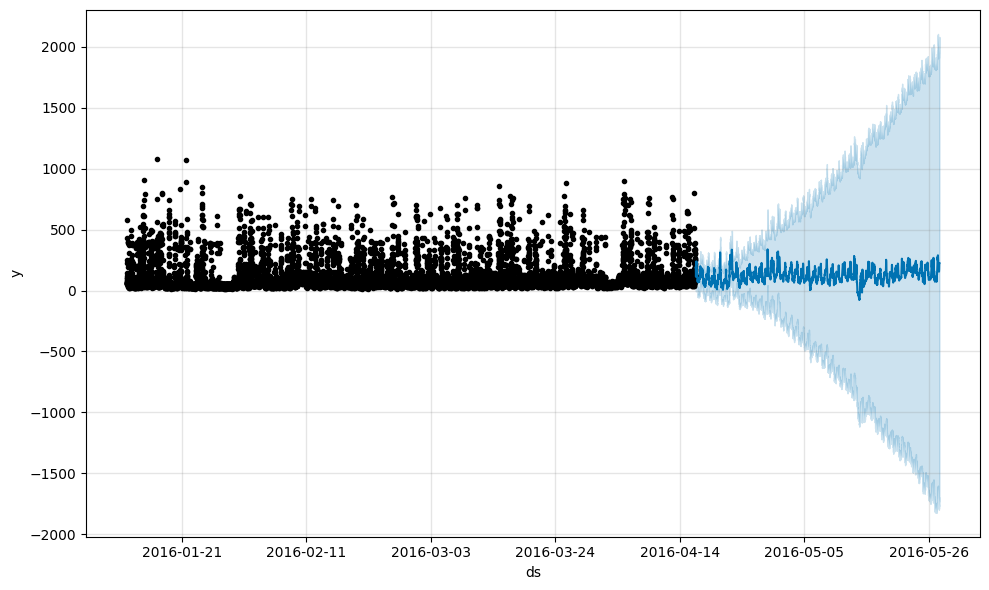

In [88]:
fig=m2.plot(forecast2)

In [89]:
from scipy.stats import pearsonr
corr, _ = pearsonr(forecast2.yhat, df_test.y)
print('Pearsons correlation: %.8f' % corr)

Pearsons correlation: 0.40044720


In [90]:
g2=pd.DataFrame(forecast2[['yhat']])
g2.to_csv('C:\\Users\\Sai Bharadwaja\\Desktop\\PGDM Marketing\\Term 5\\Big Data Analytics\\Project\\KAG_energydata_complete.csv')

In [91]:
import math
import numpy as np
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_test['y'], forecast2['yhat'])
print("Mean Square Error:\n")
print(mse)
rsme = math.sqrt(mse)
print("\nRoot Mean Square Error:\n")
print(rsme)
corr_matrix = np.corrcoef(df_test['y'], forecast2['yhat'])
corr = corr_matrix[0,1]
R_sq = corr**2
print("\n R Square:\n")
print(R_sq)

Mean Square Error:

8236.600267220216

Root Mean Square Error:

90.75571754561922

 R Square:

0.1603579607110241
